<a href="https://colab.research.google.com/github/rishabh-ghub/PCA-KMeans-Classification/blob/main/RishabhMathur_Task_DataMining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET FROM DIRECTORY

In [ ]:
from google.colab import files 


uploaded = files.upload()


Saving data.csv to data.csv


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

DISPLAYING DATASET

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv'])) 
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


COLUMNS NAMES

In [ ]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df1 = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [ ]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


PCA 

STANDAEDIZATION

In [ ]:
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(df1)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
a_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(569, 30)

In [ ]:
a_pca.shape

(569, 2)

RELATIVE INFORMATION GAIN CANCER/NOT CANCER

CANCER : M (MELIGNENT)
NOT-CANCER : B (BENIGN)

In [ ]:
check_values = df['diagnosis']
print(check_values)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [ ]:
df = df.drop(['diagnosis','id','Unnamed: 32'], axis=1)
df.head()
df_pca = df

PLOTTING GRAPHS / DATA VISUALIZATION

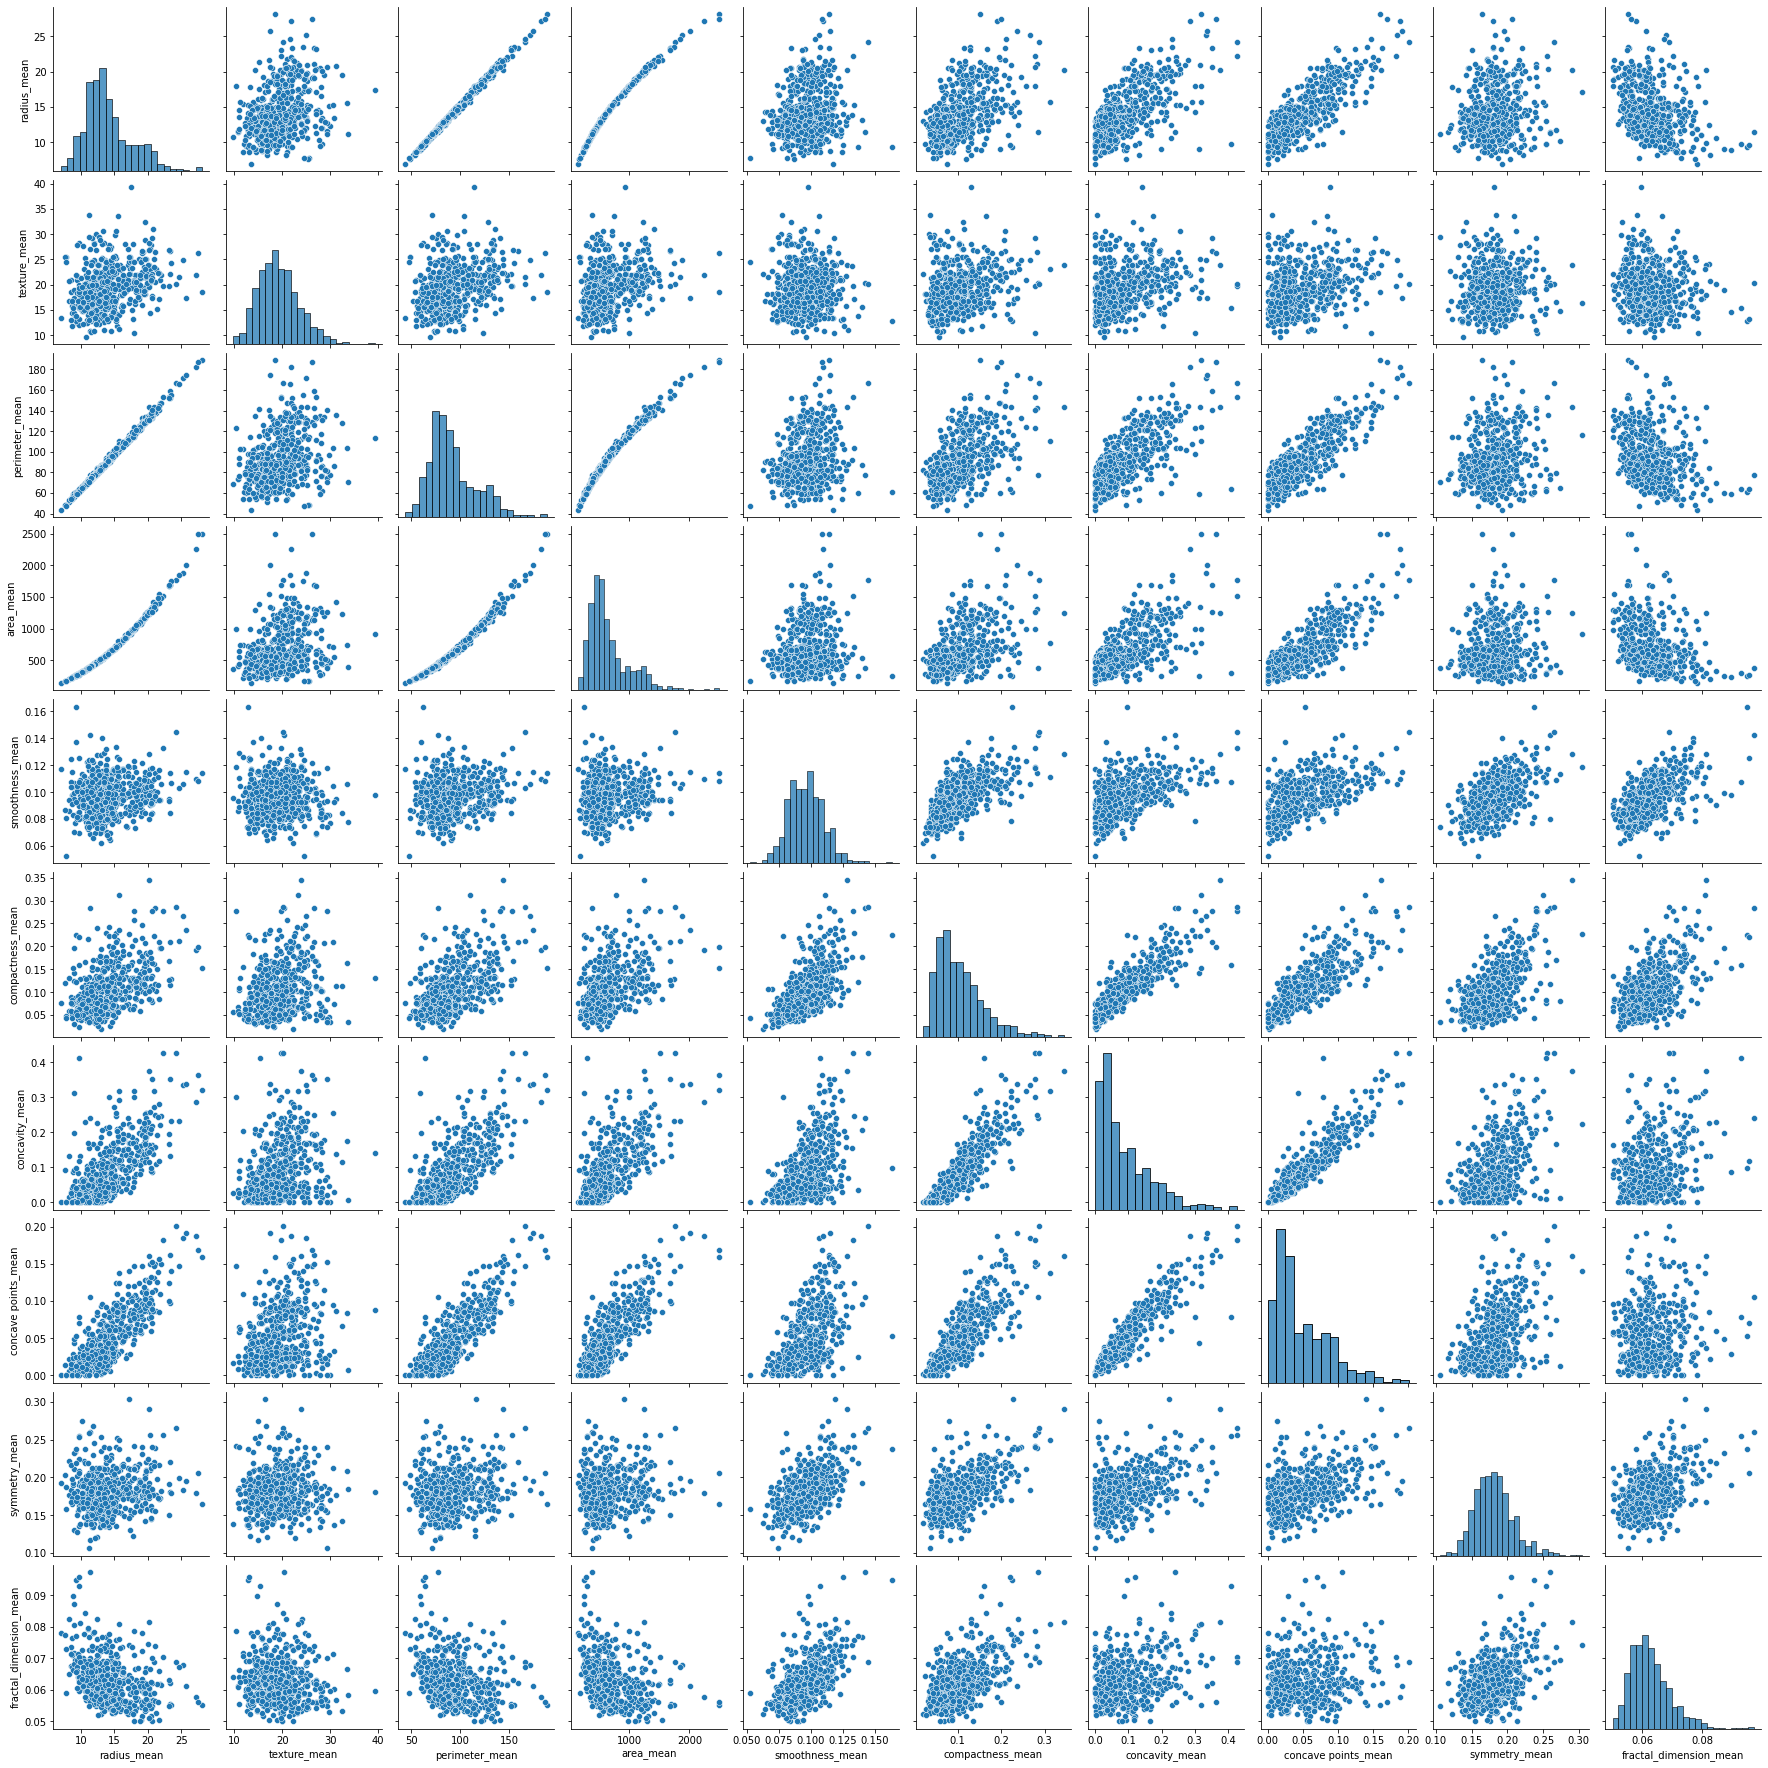

In [ ]:
import seaborn as sns
sns.pairplot(df.iloc[:,:10])

K-MEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
labels = kmeans.labels_

In [ ]:
df['clusters']=labels
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df.clusters
comparison_df = pd.concat([check_values,df.clusters],axis=1)
comparison_df.head()


,diagnosis,clusters
0,M,1
1,M,1
2,M,1
3,M,0
4,M,1


In [ ]:
m0 = pd.Series(check_values.replace(['M',"B"],[0,1]))
#adding to my original"comparison_df"
comparison_df = pd.concat([comparison_df,m0],axis=1)

In [ ]:
comparison_df.head()

,diagnosis,clusters,diagnosis
0,M,1,0
1,M,1,0
2,M,1,0
3,M,0,0
4,M,1,0


In [ ]:
comparison_df.columns = ['diagnosis','clusters','m0']
comparison_df.head()

,diagnosis,clusters,m0
0,M,1,0
1,M,1,0
2,M,1,0
3,M,0,0
4,M,1,0


In [ ]:
correct = len(comparison_df[comparison_df['m0'] == comparison_df['clusters']])
total = len(df)
print(correct,total, correct/total)

83 569 0.14586994727592267


In [ ]:
from numpy import array
np_data = array(df_pca)
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
pca = PCA(2)
pca.fit(norm_data)
eigenvecs= pca.components_
eigenvals = pca.explained_variance_
pca_val = pca.transform(norm_data)
pca_val

array([[ 9.32458357,  2.15004105],
       [ 2.80075393, -3.87551183],
       [ 6.00963721, -1.0251781 ],
       ...,
       [ 1.16121013, -1.70080373],
       [10.48213445,  1.96271873],
       [-5.45445088, -0.89170135]])

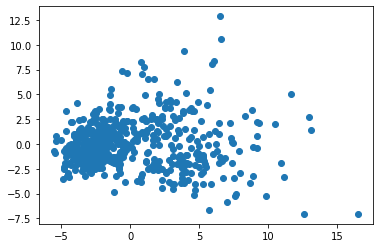

In [ ]:
plt.scatter(pca_val[:,0],pca_val[:,1])

(array([[ 0.,  3., 28., 42., 13.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  3., 54., 94., 42.,  9.,  1.,  0.,  0.,  0.],
        [ 0.,  5., 14., 33., 25.,  7.,  0.,  5.,  0.,  0.],
        [ 0.,  6., 19., 13., 20.,  9.,  3.,  0.,  0.,  0.],
        [ 1.,  7., 34., 10.,  6.,  8.,  2.,  0.,  1.,  0.],
        [ 3.,  4.,  5.,  7.,  5.,  1.,  1.,  2.,  1.,  1.],
        [ 1.,  2.,  1.,  4.,  3.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([-5.54215288, -3.33390833, -1.12566377,  1.08258078,  3.29082533,
         5.49906989,  7.70731444,  9.91555899, 12.12380355, 14.3320481 ,
        16.54029265]),
 array([-7.05830688, -5.06527795, -3.07224901, -1.07922008,  0.91380886,
         2.90683779,  4.89986672,  6.89289566,  8.88592459, 10.87895352,
        12.87198246]),
 <matplotlib.collections.QuadMesh at 0x7f38705dbe90>)

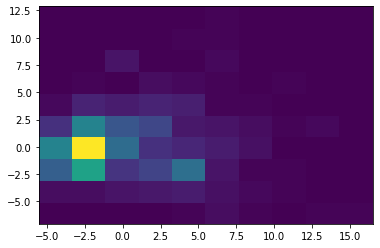

In [ ]:
plt.hist2d(pca_val[:,0],pca_val[:,1])

In [ ]:
kmeans_pca1 = KMeans(n_clusters= 2)
kmeans_pca1.fit(pca_val)
klabels = kmeans.labels_
klabels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
check_vals = array(m0)
sum(check_vals == klabels)

83

In [ ]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=3, length=13)
 
    ax.set_xlabel("Principal_Component")
    ax.set_ylabel("Variance_Explained_in_(%)")
    plt.title('Variance_per_Principal_Component')

CLREATING PCA INSTANCE

(569, 31)
[0.44597568 0.63481398 0.72577839 0.78969636 0.84302199 0.88196949
 0.90378241 0.9193525  0.9337333  0.94549651 0.95585931 0.96430234
 0.97239035 0.97921628 0.98411009]


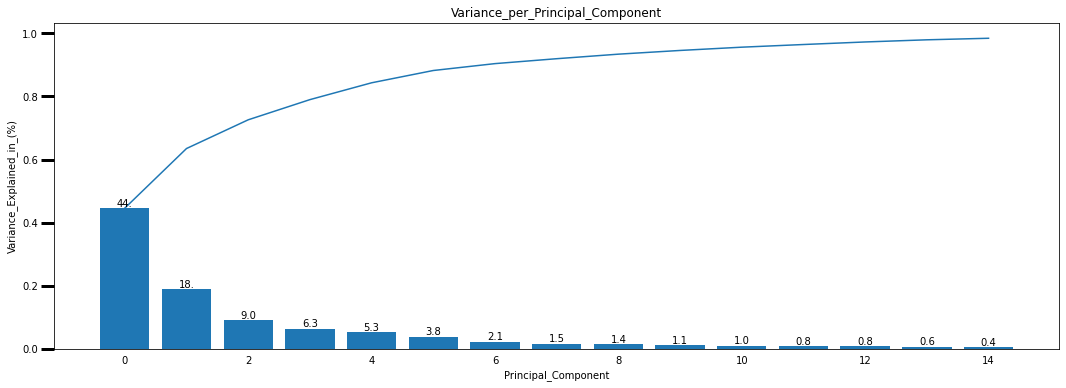

In [ ]:
pca = PCA(15)
print(norm_data.shape)
pca.fit(norm_data)
vals = pca.explained_variance_ratio_
aggt = np.cumsum(vals)
print(aggt)
eigenvecs= pca.components_
eigenvals = pca.explained_variance_

scree_plot(pca)

NORMALIZED DATA

In [ ]:
pca = PCA(5)
pca.fit(norm_data)
pca5_vals = pca.transform(norm_data)
pca5_vals

array([[ 9.32458357,  2.15004105, -1.1121079 , -3.64428436, -1.18236784],
       [ 2.80075393, -3.87551185, -0.52804305, -1.12423028,  0.59770017],
       [ 6.00963721, -1.02517807, -0.54944625, -0.91828663, -0.18770799],
       ...,
       [ 1.16121013, -1.70080374,  0.51650712,  2.12775476,  1.86701931],
       [10.48213445,  1.96271876, -1.88501745,  2.35526026, -0.04759055],
       [-5.45445088, -0.89170132,  1.502841  ,  2.28933111, -0.22040236]])

K-MEANS CLUSTERING FOR DIFFERENT K VALUES

K=2,3,5

In [ ]:
davies_bouldin_score(X, labels)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
kmeans_pca2 = KMeans(n_clusters= 3)
kmeans_pca2.fit(pca5_vals)
label = kmeans_pca2.labels_
label

array([0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
kmeans_pca2 = KMeans(n_clusters= 5)
kmeans_pca2.fit(pca5_vals)
label = kmeans_pca2.labels_
label

array([1, 4, 4, 3, 4, 3, 4, 3, 3, 3, 0, 4, 1, 0, 3, 3, 0, 3, 4, 0, 0, 2,
       3, 4, 4, 1, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 0, 0, 3, 0, 2, 1, 3,
       0, 4, 2, 3, 0, 0, 0, 0, 0, 4, 0, 2, 4, 3, 0, 2, 2, 2, 3, 2, 3, 3,
       2, 0, 3, 0, 4, 3, 3, 0, 0, 4, 2, 1, 1, 0, 2, 3, 1, 4, 2, 4, 2, 4,
       2, 3, 0, 0, 0, 0, 3, 4, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 2, 0, 1, 2,
       2, 2, 3, 2, 2, 0, 2, 3, 3, 4, 0, 4, 1, 0, 0, 0, 0, 4, 3, 4, 2, 4,
       4, 0, 4, 0, 0, 0, 4, 2, 0, 4, 2, 0, 0, 2, 3, 2, 0, 0, 2, 3, 3, 0,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 2, 4, 0, 0, 4, 4, 0, 0, 0, 3, 2, 2, 2,
       3, 3, 0, 0, 1, 1, 4, 0, 0, 2, 4, 0, 2, 0, 3, 2, 2, 3, 3, 0, 3, 4,
       4, 3, 2, 4, 1, 3, 2, 0, 2, 4, 3, 0, 4, 0, 1, 3, 3, 3, 2, 2, 4, 4,
       0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 4, 0, 0, 4, 2, 0, 1, 4, 0, 4, 0, 0,
       3, 0, 4, 2, 0, 3, 2, 0, 1, 0, 1, 4, 4, 2, 1, 3, 1, 3, 4, 0, 4, 0,
       4, 4, 2, 0, 0, 2, 0, 0, 1, 2, 4, 2, 0, 4, 0, 0, 4, 2, 4, 3, 0, 0,
       2, 0, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1,

In [ ]:
check_vals = array(m0)
wrong =sum(check_vals == labels)
wrong

83

In [ ]:
correct = len(df)-wrong
total = len(df)
print('total_correct => ',correct)
print("%_correct => ",correct/total)

total_correct =>  486
%_correct =>  0.8541300527240774


DAVIES-BOULDIN INDEX


In [ ]:
from sklearn.metrics import davies_bouldin_score 


In [ ]:
kmeans_pca2 = KMeans(n_clusters= 5).fit(df)
kmeans_pca2.fit(pca5_vals)
label = kmeans_pca2.labels_
davies_bouldin_score(df, label)

1.9110295489420295

PURITY OF CLUSTER

In [ ]:
from sklearn import mixture
clusterer = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [ ]:
# DF is the dataframe
# It is actually a 2D PCA projection of data
# extracted from the dataset
clusterer.fit(df)
cluster_labels = clusterer.predict(df)
# Now I can count the labels for each cluster..
count0 = list(cluster_labels).count(0)
count1 = list(cluster_labels).count(1)
count2 = list(cluster_labels).count(2)
print(count0)
print(count1)
print(count2)


114
434
21
